# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="../images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 03: Model training & UI Exploration</span>

<span style="font-width:bold; font-size: 1.4rem;">In this last notebook, we will train a model on the dataset we created in the previous tutorial. We will train our model using standard Python and Scikit-learn, although it could just as well be trained with other machine learning frameworks such as PySpark, TensorFlow, and PyTorch. We will also show some of the exploration that can be done in Hopsworks, notably the search functions and the lineage. </span>

## **🗒️ This notebook is divided in 3 main sections:** 
1. **Loading the training data**
2. **Train the model**
3. **Explore feature groups and views** via the UI.

![tutorial-flow](images/03_model.png)

In [1]:
!pip install -U scikit-learn==0.22.2.post1 --quiet
!pip install -U seaborn --quiet

In [5]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/146
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
feature_view = fs.get_feature_view("transactions_view", 1)

## <span style="color:#ff5f27;"> ✨ Load Training Data </span>

First, we'll need to fetch the training dataset that we created in the previous notebook. We will use January - February data training and testing.

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

train_jan_feb_x, train_jan_feb_y = feature_view.get_training_data(1)
train_mar_x, train_mar_y = feature_view.get_training_data(2)

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20

In [7]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.8.11 (default, Aug  6 2021, 08:56:27)  [Clang 10.0.0 ]
executable: /Users/davitbzhalava/opt/anaconda3/envs/py38/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
       pip: 21.2.4
setuptools: 58.0.4
   sklearn: 0.22.2.post1
     numpy: 1.20.2
     scipy: 1.7.2
    Cython: None
    pandas: 1.4.2
matplotlib: 3.4.3
    joblib: 1.1.0

Built with OpenMP: True
None


## <span style="color:#ff5f27;"> 🏃 Train Model</span>

Next we'll train a model. Here, we set the class weight of the positive class to be twice as big as the negative class.

In [8]:
import numpy as np
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(train_jan_feb_x)

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FF498417040, verbose=0,
                warm_start=False)

In [9]:
# Train Predictions
y_pred_train = clf.predict(train_jan_feb_x)

In [10]:
# Test Predictions
y_pred_test = clf.predict(train_mar_x)

<AxesSubplot:>

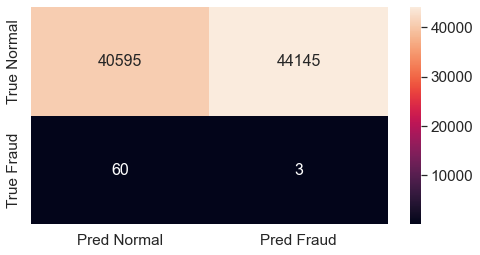

In [11]:
from sklearn.metrics import confusion_matrix, f1_score
from matplotlib import pyplot
import seaborn as sn

%matplotlib inline

if_cm=confusion_matrix(train_mar_y, y_pred_test)
pd.DataFrame(if_cm)
df_cm = pd.DataFrame(if_cm, ['step', 'True Normal',  'True Fraud'],['Pred Normal', 'step', 'Pred Fraud'])
df_cm.drop(index="step",inplace=True)
df_cm.drop("step", axis=1, inplace=True)

pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

<AxesSubplot:>

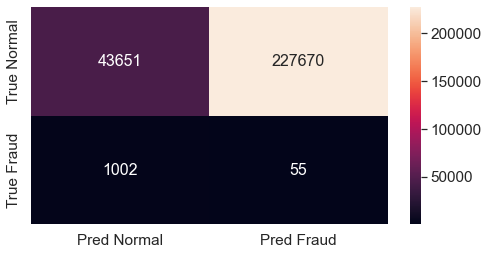

In [12]:
if_cm=confusion_matrix(train_jan_feb_y, y_pred_train)
pd.DataFrame(if_cm)
df_cm = pd.DataFrame(if_cm, ['step', 'True Normal',  'True Fraud'],['Pred Normal', 'step', 'Pred Fraud'])
df_cm.drop(index="step",inplace=True)
df_cm.drop("step", axis=1, inplace=True)

pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [13]:
# Compute f1 score
metrics = {"fscore": f1_score(train_mar_y, y_pred_test, average='micro')}
metrics

{'fscore': 3.53761069773475e-05}


## <span style="color:#ff5f27;"> Register model</span>

One of the features in Hopsworks is the model registry. This is where we can store different versions of models and compare their performance. Models from the registry can then be served as API endpoints.

Let's connect to the model registry using the HSML library from Hopsworks.

In [14]:
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.


In [15]:
import joblib

joblib.dump(clf, 'model.pkl')

['model.pkl']

The model needs to be set up with a Model Schema, which describes the inputs and outputs for a model.

A Model Schema can be automatically generated from training examples, as shown below.

In [16]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(train_jan_feb_x)
output_schema = Schema(train_jan_feb_y)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'columnar_schema': [{'name': 'loc_delta_t_plus_1',
    'type': 'float64'},
   {'name': 'loc_delta_t_minus_1', 'type': 'float64'},
   {'name': 'time_delta_t_plus_1', 'type': 'float64'},
   {'name': 'time_delta_t_minus_1', 'type': 'float64'},
   {'name': 'country', 'type': 'int64'}]},
 'output_schema': {'columnar_schema': [{'name': 'fraud_label',
    'type': 'int64'}]}}

In [17]:
model = mr.sklearn.create_model(
    name="fraud_tutorial_model",
    metrics=metrics,
    description="Isolation forest anomaly detection model",
    input_example=train_jan_feb_x.sample(),
    model_schema=model_schema
)

model.save('model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/146/models/fraud_tutorial_model/1


Model(name: 'fraud_tutorial_model', version: 1)

## <span style="color:#ff5f27;"> Deploy model</span>
### About Model Serving
Models can be served via KFServing or "default" serving, which means a Docker container exposing a Flask server. For KFServing models, or models written in Tensorflow, you do not need to write a prediction file (see the section below). However, for sklearn models using default serving, you do need to proceed to write a prediction file.

In order to use KFServing, you must have Kubernetes installed and enabled on your cluster.

### Create the Prediction File
In order to deploy a model, you need to write a Python file containing the logic to return a prediction from the model. Don't worry, this is usually a matter of just modifying some paths in a template script. An example can be seen in the code block below, where we have taken this Scikit-learn template script and changed two paths (see comments).

In [18]:
%%writefile predict_example.py
import os
from sklearn.externals import joblib

class Predict(object):

    def __init__(self):
        """ Initializes the serving state, reads a trained model from HDFS"""
        # load the trained model
        self.model = joblib.load(os.environ["ARTIFACT_FILES_PATH"] + "/model.pkl")
        print("Initialization Complete")


    def predict(self, inputs):
        """ Serves a prediction request usign a trained model"""
        return self.model.predict(inputs).tolist() # Numpy Arrays are not JSON serializable


Overwriting predict_example.py


If you wonder why we use the path Models/fraud_tutorial_model/1/model.pkl, it is useful to know that the Data Sets tab in the Hopsworks UI lets you browse among the different files in the project. Registered models will be found underneath the Models directory. Since we saved our model with the name fraud_tutorial_model, that's the directory we should look in. 1 is just the version of the model we want to deploy.

This script needs to be put into a known location in the Hopsworks file system. Let's call the file predict_example.py and put it in the Models directory.

In [19]:
import os
dataset_api = project.get_dataset_api()

uploaded_file_path = dataset_api.upload("predict_example.py", "Models", overwrite=True)
predictor_script_path = os.path.join("/Projects", project.name, uploaded_file_path)

Uploading: 0.000%|          | 0/521 elapsed<00:00 remaining<?

## Create the deployment
Here, we fetch the model we want from the model registry and define a configuration for the deployment. For the configuration, we need to specify the serving type (default or KFserving) and in this case, since we use default serving and an sklearn model, we need to give the location of the prediction script.

In [21]:
# Use the model name from the previous notebook.
model = mr.get_model("fraud_tutorial_model", version=1)

# Give it any name you want
deployment = model.deploy(
    name="frauddeployment2", 
    model_server="PYTHON",
    serving_tool="KSERVE",
    script_file=predictor_script_path
)

Deployment created, explore it at https://c.app.hopsworks.ai:443/p/146/deployments/18
Before making predictions, start the deployment by using `.start()`


In [22]:
print("Deployment: " + deployment.name)
deployment.describe()


Deployment: frauddeployment2
{
    "artifact_version": 1,
    "batching_configuration": {
        "batching_enabled": false
    },
    "created": "2022-06-18T14:16:30.631Z",
    "creator": "Davit Bzhalava",
    "id": 18,
    "inference_logging": "NONE",
    "model_name": "fraud_tutorial_model",
    "model_path": "/Projects/davit000/Models/fraud_tutorial_model",
    "model_server": "PYTHON",
    "model_version": 1,
    "name": "frauddeployment2",
    "predictor": "predict_example.py",
    "predictor_resources": {
        "limits": {
            "cores": 1,
            "gpus": 0,
            "memory": 1024
        },
        "requests": {
            "cores": 1,
            "gpus": 0,
            "memory": 1024
        }
    },
    "requested_instances": 1,
    "serving_tool": "KSERVE"
}


#### The deployment has now been registered. However, to start it you need to run:

In [25]:
deployment.start()

  0%|          | 0/1 [00:00<?, ?it/s]

Start making predictions by using `.predict()`


In [26]:
deployment.get_logs()

Explore all the logs and filters in the Kibana logs at https://c.app.hopsworks.ai:443/p/146/deployments/18

Instance name: frauddeployment2-predictor-default-00001-deployment-68cf5fg6tpd
/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[I 220618 14:16:59 kserve-component-server:27] Initializing predictor for deployment: frauddeployment2
[I 220618 14:16:59 kfserver:150] Registering model: frauddeployment2
[I 220618 14:16:59 kfserver:120] Setting asyncio max_workers as 5
[I 220618 14:16:59 kfserver:127] Listening on port 8080
[I 220618 14:16:59 kfserver:129] Will fork 1 workers




## Using the deployment
Let's use the input example that we registered together with the model to query the deployment.

In [28]:
test_inputs = [model.input_example]

data = {
    "inputs": test_inputs
}

deployment.predict(data)

{'predictions': [1]}

In [29]:
deployment.get_logs()

Explore all the logs and filters in the Kibana logs at https://c.app.hopsworks.ai:443/p/146/deployments/18

Instance name: frauddeployment2-predictor-default-00001-deployment-68cf5fg6tpd
/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[I 220618 14:16:59 kserve-component-server:27] Initializing predictor for deployment: frauddeployment2
[I 220618 14:16:59 kfserver:150] Registering model: frauddeployment2
[I 220618 14:16:59 kfserver:120] Setting asyncio max_workers as 5
[I 220618 14:16:59 kfserver:127] Listening on port 8080
[I 220618 14:16:59 kfserver:129] Will fork 1 workers
[I 2

### Use REST endpoint

You can also use a REST endpoint for your model. To do this you need to create an API key with 'serving' enabled, and retrieve the endpoint URL from the Model Serving UI.

Go to the Model Serving UI and click on the eye icon next to a model to retrieve the endpoint URL. The shorter URL is an internal endpoint that you can only reach from within Hopsworks. If you want to call it from outside, you need one of the longer URLs. Make sure to use https instead of http. (TODO this should be fixed)


![serving-endpoints](../images/serving_endpoints.gif)

In [18]:
import os
import requests

mr = project.get_model_registry()

# Use the model name from the previous notebook.
model = mr.get_model("fraud_tutorial_model", version=1)

test_inputs = [model.input_example]

API_KEY = "..."  # Put your API key here.
MODEL_SERVING_URL = "..." # Put model serving endppoint here.
HOST_NAME = "..." # Put your hopsworks model serving hostname here 

data = {"inputs": test_inputs}
headers = {
    "Content-Type": "application/json", "Accept": "application/json",
    "Authorization": f"ApiKey {API_KEY}",
    "Host": HOST_NAME}

response = requests.post(MODEL_SERVING_URL, verify=False, headers=headers, json=data)
response.json()

Connected. Call `.close()` to terminate connection gracefully.


{'predictions': [1]}

In [20]:
# Now lets test feature vectors from online store
data = {"inputs": feature_vector = feature_view.get_feature_vector({"cc_num": 4467360740682089})}
response = requests.post(url, verify=False, headers=headers, json=data)
response.json()

{'predictions': [1]}

## Stop Deployment
To stop the deployment we simply run:

In [ ]:
deployment.stop()

## <span style="color:#ff5f27;"> 🎁  Wrapping things up </span>

In this module we introduced stream feature group, performed with training data that we have created from feature view and depoyed model in production.